In [2]:
import numpy as np
import pandas as pd

# Metadata stats and merging metadata files (3 studies)

## 1. Metadata check cols

### ROSMAP

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/ROSMAP_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


specimenID                                      2456
individualID                                    1128
diagnosis                                          3
tissue                                             3
race                                               3
spanish                                            2
apoe4_allele                                       3
sex                                                2
final_batch                                       17
pmi                                              437
RIN                                              214
RIN2                                             214
age_death                                        454
AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED    2368
RnaSeqMetrics_PCT_INTRONIC_BASES                2450
RnaSeqMetrics_PCT_INTERGENIC_BASES              2377
RnaSeqMetrics_PCT_CODING_BASES                  2448
dtype: int64

In [ ]:
df.columns

In [ ]:
column_names = ['diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'final_batch', 'pmi', 'RIN', 'RIN2', 'age_death']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

### MSSB

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/MSBB_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


In [ ]:
df.columns

In [ ]:
column_names = ['tissue', 'sex', 'race', 'spanish', 'ethnicity',
       'age_death', 'RIN', 'RIN2', 'diagnosis', 'sequencingBatch', 'pmi',
       'apoe4_allele']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

### MAYO

In [ ]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('./AMP_AD_datasets/Mayo_Covariates_ages_censored.tsv', sep='\t')

# Calculating the number of unique values in each column
unique_values = df.nunique()

unique_values


In [ ]:
df.columns

In [ ]:
column_names = ['tissue', 'diagnosis', 'apoe4_allele',
       'sex', 'flowcell', 'pmi', 'RIN', 'RIN2', 'age_death']

# Function to print unique values and their counts for given column names
def print_unique_values_counts(dataframe, columns):
    for column in columns:
        print(f"Unique value counts for {column}:")
        print(dataframe[column].value_counts())
        print("\n")  # Print a newline for better readability between columns

# Call the function with the DataFrame and list of column names
print_unique_values_counts(df, column_names)

## 2. Name Corrections in metadata files before merging files

In [ ]:
import pandas as pd

# Step 1: Load the DataFrame from a TSV file
file_path = './AMP_AD_datasets/Mayo_Covariates_ages_censored.tsv'  # Update this to your actual file path
df = pd.read_csv(file_path, sep='\t')

df = df.rename(columns={'flowcell': 'batch'})

# Step 2: Identify unique values in 'batch' column and sort them alphabetically
unique_batches = sorted(df['batch'].unique())

# Step 3: Assign a unique number to each sorted unique value
batch_to_number = {batch: i+1 for i, batch in enumerate(unique_batches)}

# Step 4: Replace the original 'batch' values in the DataFrame with the assigned numbers
df['batch'] = df['batch'].map(batch_to_number)

# Step 5: Save the modified DataFrame as a CSV file
new_file_path = './AMP_AD_datasets/MAYO_metadata_v1.csv'  # Update this to your desired new file path
df.to_csv(new_file_path, index=False)  # Set index=False to avoid saving the index as a separate column


In [ ]:
df

## 3. Merging the metadata files

In [ ]:
import pandas as pd

# List of CSV file names
file_names = ['./AMP_AD_datasets/ROSMAP_metadata_v1.csv', 
              './AMP_AD_datasets/MSBB_metadata_v1.csv', 
              './AMP_AD_datasets/MAYO_metadata_v1.csv']

# Empty list to hold DataFrames
dfs = []

# Columns to ensure are in each DataFrame
required_columns = ['race', 'spanish', 'ethnicity']

# Step 1: Read each CSV file and process
for file_name in file_names:
    # Read the CSV file
    df = pd.read_csv(file_name)
    
   
    # Ensure all required columns are present, add them if they are not
    for column in required_columns:
        if column not in df.columns:
            df[column] = pd.NA
    
    df['study'] = file_name.split('/')[2].split('_')[0]
            
    # Append to the list of DataFrames
    dfs.append(df)

# Use the column order of the first DataFrame for all others, including any new columns
column_order = dfs[0].columns.tolist()

# Reorder and concatenate, ensuring all DataFrames have the same column order
merged_df = pd.concat([df.reindex(columns=column_order) for df in dfs], ignore_index=True)

# Step 5: Save the merged DataFrame to a new CSV file
merged_df.to_csv('./merged_metadata.csv', index=False)


In [ ]:
merged_df

## 4. Mapping values to numerics in merged metadata

In [ ]:
import pandas as pd

# Path to your CSV file
file_path = './merged_metadata.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Dictionaries for conversion
diagnosis = {'AD':1, 'CT':0, 'OTHER':2, 'PSP':3, 'PATH_AGE':4}
sex = {'male': 0, 'female': 1}
tissue = {'ACC': 1, 'CBE': 2, 'DLPFC': 3, 'FP': 4, 'IFG': 5, 'PCC': 6, 'PHG': 7, 'STG': 8, 'TCX': 9}

# Convert values in the 'diagnosis', 'sex', and 'tissue' columns using the map method
df['diagnosis'] = df['diagnosis'].map(diagnosis)
df['sex'] = df['sex'].map(sex)
df['tissue'] = df['tissue'].map(tissue)

# Change '90+' value in the 'age_death' column to 90
df['age_death'] = df['age_death'].replace('90+', 90)

# Save the modified DataFrame back to a new CSV file
df.to_csv('./metadata_v1.csv', index=False)


In [ ]:
df

In [ ]:
# Calculate the number of NULL values in each column
null_values = df.isnull().sum()

# Print the result
print(null_values)

## 5. Filtering metadata with diagnosis

In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './metadata_v1.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
filtered_df = df[df['diagnosis'].isin([0, 1])]
filtered_df.reset_index(drop=True)
filtered_df.to_csv('metadata_v2_d_filtered.csv', index=False)


In [47]:
file_path = './metadata_merged.csv'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)
df

,specimenID,individualID,diagnosis,tissue,race,spanish,apoe4_allele,sex,batch,pmi,RIN,RIN2,age_death,AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED,RnaSeqMetrics_PCT_INTRONIC_BASES,RnaSeqMetrics_PCT_INTERGENIC_BASES,RnaSeqMetrics_PCT_CODING_BASES,ethnicity,study
0,487_120515,R9904978,0,3,1.0,2.0,0,0,4,12.433333,6.9,47.61,72.720055,0.931411,0.225013,0.058488,0.342722,NaN,ROSMAP
1,182_120424,R9818080,0,3,1.0,2.0,0,0,7,16.000000,8.4,70.56,81.111567,0.944450,0.172408,0.041036,0.394201,NaN,ROSMAP
2,193_120424,R9817161,1,3,1.0,2.0,0,1,4,1.750000,7.1,50.41,80.906229,0.958718,0.203963,0.048166,0.357855,NaN,ROSMAP
3,694_120605,R9817056,0,3,1.0,2.0,0,0,4,6.416667,7.1,50.41,87.753593,0.960609,0.201002,0.045065,0.397276,NaN,ROSMAP
4,366_120502,R9809661,1,3,1.0,2.0,1,1,7,17.416667,7.4,54.76,90.000000,0.931962,0.205742,0.048650,0.378299,NaN,ROSMAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,948_CBE,948,1,2,NaN,NaN,0,1,24,4.000000,7.9,62.41,82.000000,0.971513,0.218398,0.102550,0.312080,NaN,MAYO
2101,952_CBE,952,1,2,NaN,NaN,1,1,30,3.000000,9.0,81.00,83.000000,0.970183,0.289034,0.107290,0.266025,NaN,MAYO
2102,966_CBE,966,1,2,NaN,NaN,2,1,22,16.000000,8.8,77.44,79.000000,0.971717,0.143079,0.069472,0.374848,NaN,MAYO
2103,976_CBE,976,1,2,NaN,NaN,1,1,19,7.000000,8.3,68.89,90.000000,0.975052,0.134213,0.080812,0.370581,NaN,MAYO


In [48]:
# Assuming 'df' is your loaded DataFrame
unique_values_per_column = df.nunique()

# Print the number of unique values in each column
print(unique_values_per_column)

specimenID                                      2105
individualID                                     835
diagnosis                                          2
tissue                                             9
race                                               4
spanish                                            2
apoe4_allele                                       3
sex                                                2
batch                                             33
pmi                                              362
RIN                                              141
RIN2                                             141
age_death                                        215
AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED    2060
RnaSeqMetrics_PCT_INTRONIC_BASES                2102
RnaSeqMetrics_PCT_INTERGENIC_BASES              2069
RnaSeqMetrics_PCT_CODING_BASES                  2099
ethnicity                                          5
study                                         

## Visualization of distribution in metadata

In [ ]:
rosmap_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './metadata_v3.csv'

# Load the CSV file into a pandas DataFrame
rosmap_df = pd.read_csv(file_path)


columns_to_visualize = ['diagnosis', 'tissue', 'apoe4_allele', 'sex']

# Adjust figsize for overall figure and subplot size, making each chart smaller
# Increase the height as needed to separate the charts more
fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(6, 3 * len(columns_to_visualize)))

for i, column in enumerate(columns_to_visualize):
    # For each column, count the occurrences of each unique value
    value_counts = rosmap_df[column].value_counts()
    
    # Plotting the bar chart for the current column
    axes[i].bar(value_counts.index.astype(str), value_counts.values, color='blue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Value')
  # Rotate x-axis labels for better readability

# Adjust layout padding
plt.tight_layout(pad=3.0)  # Increase pad size for more space between subplots

plt.show()


# Feature importance selection (Ignored)

## Chi-Square method for categorical

In [ ]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = './b'  # Replace 'your_file_path.csv' with the path to your actual CSV file
df = pd.read_csv(file_path)

# Filter the DataFrame
ROSMAP_df = df[(df['study'] == 'ROSMAP') & (df['diagnosis'].isin([0, 1]))]

# Display the filtered DataFrame
ROSMAP_df


FileNotFoundError: [Errno 2] No such file or directory: './metadata_v1.csv'

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Assuming ROSMAP_df is already defined and loaded with your data

# Specify your binary target column and the list of categorical independent variable names
target_column = 'diagnosis'
independent_variables = ['tissue', 'race', 'spanish', 'apoe4_allele', 'sex', 'batch']

# Ensure the target variable is binary and encoded as 0s and 1s
le = LabelEncoder()
ROSMAP_df.loc[:, target_column] = le.fit_transform(ROSMAP_df[target_column])

# Convert categorical variables to type 'category' if they aren't already
for var in independent_variables:
    ROSMAP_df.loc[:, var] = ROSMAP_df[var].astype('category')

# Note: There's a mistake in your chi2 function call; it should reference ROSMAP_df, not df
chi_scores, p_values = chi2(ROSMAP_df[independent_variables].apply(lambda x: x.cat.codes), ROSMAP_df[target_column])

# Display the p-values for each independent variable
for var, p in zip(independent_variables, p_values):
    print(f"P-value for {var}: {p}")


In [ ]:
ROSMAP_df

## Normality of the continous independent variables

In [ ]:
import pandas as pd
from scipy.stats import shapiro


# List of your continuous variable column names
continuous_variables = ['pmi', 'RIN', 'RIN2', 'age_death', 'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES',
                        'RnaSeqMetrics_PCT_CODING_BASES']  # Replace these with your actual column names

# Initialize an empty dictionary to store Shapiro-Wilk test results
normality_test_results = {}

# Perform the Shapiro-Wilk test for each variable
for var in continuous_variables:
    stat, p_value = shapiro(ROSMAP_df[var].dropna())  # dropna() to remove missing values
    normality_test_results[var] = p_value

    # Interpret the results
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print(f"{var}: Data looks normal (fail to reject H0, p-value={p_value:.3f})")
    else:
        print(f"{var}: Data does not look normal (reject H0, p-value={p_value:.3f})")


## Reg model for continous variables p-value

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Specify your binary target column and list of independent variable names
target_column = 'diagnosis'  # Replace with your actual target column name
independent_variables = ['pmi', 'RIN', 'RIN2', 'age_death', 'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES',
                        'RnaSeqMetrics_PCT_CODING_BASES']

# Ensure the independent variables and target are correctly formatted
X = ROSMAP_df[independent_variables]
y = ROSMAP_df[target_column]

# Add a constant to the independent variables set for statsmodels
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X).fit()

# Display the summary of the model which includes p-values among other statistics
print(model.summary())


# Distribution of gene expresion levels Histogram

In [ ]:
import pandas as pd

dff = pd.read_csv("/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv", sep='\t')

df = dff.iloc[:, 1:]
# Count negative values across the DataFrame
negative_values_count = (df < 0).sum().sum()  # Sums up all the True values for the condition df < 0

# Count NaN (NULL) values across the DataFrame
null_values_count = df.isnull().sum().sum()  # Sums up all the NaN values

print(f"Total negative values in the dataset: {negative_values_count}")
print(f"Total NULL (NaN) values in the dataset: {null_values_count}")


In [ ]:
dff

In [ ]:
import pandas as pd
import numpy as np  # For numerical operations

# Load your DataFrame, ensuring the first column (gene names) is read as a regular column
df = pd.read_csv("/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_Normalized_counts_(CQN).tsv", sep='\t')

# Calculate the median and variance for each gene across samples
df['Median'] = df.iloc[:, 1:].mean(axis=1)  # Exclude the first column (gene names) for calculation
df['Variance'] = df.iloc[:, 1:].var(axis=1)  # Exclude the first column (gene names) for calculation

# Transform the median and variance back from log2 values
df['Median_back_transformed'] = np.power(2, df['Median'])
df['Variance_back_transformed'] = np.power(2, df['Variance'])

# Create a new DataFrame with gene names, median, variance, and their back-transformed values
output_df = df[['feature', 'Median', 'Variance', 'Median_back_transformed', 'Variance_back_transformed']]

# Save the new DataFrame to a CSV file
output_df.to_csv('mean_ROSMAP.csv', index=False)

print("Gene expression statistics computed and back-transformed values added successfully.")


In [ ]:
dff = pd.read_csv("mean_ROSMAP.csv")
dff

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame with median and variance back-transformed values
df = pd.read_csv('median_ROSMAP.csv')

# Histogram for Median_back_transformed
plt.figure(figsize=(8, 5))
plt.hist(df['Median_back_transformed'], bins=3000, alpha=0.7)
plt.xlabel('Expression Levels')
plt.ylabel('Frequency')
plt.title('Median of gene expression levels')
plt.legend()
plt.xlim(0, 600)  # Limiting the x-axis to be between 0 and 2
plt.show()

# Histogram for Variance_back_transformed
plt.figure(figsize=(8, 5))
# Use np.logspace to create logarithmic bins
logbins = np.logspace(np.log10(df['Variance_back_transformed'].min()), np.log10(df['Variance_back_transformed'].max()), 50)
plt.hist(df['Variance_back_transformed'], bins=logbins, alpha=0.7, color='orange')
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Variance (log scale)')
plt.ylabel('Frequency')
plt.title('Variance of gene expression levels')
plt.legend()
plt.show()
plt.savefig("mean_r.png")

# Datasets filtering (cleaning)

Filtering the RNAseq datasets (genes and samples)

### 1. Harmonizing genes throughout three datasets (separately)

In [5]:
rnaseq = pd.read_csv('./AMP_AD_datasets/ROSMAP_Residualized_counts_(age-death).tsv', sep='\t', header=None).T

# Set the first row as the header
rnaseq.columns = rnaseq.iloc[0]

# Drop the first row as it's now set as the header
rnaseq = rnaseq[1:]

# Set the first column as the index
rnaseq.set_index(rnaseq.columns[0], inplace=True)


rnaseq

/tmp/ipykernel_39067/1349606160.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
feature,,,,,,,,,,,,,,,,,,,,,
510_120515,0.547178095212917,0.0309218787590315,-0.0372678350757441,0.396124646614575,0.432101014475444,1.2173794211485,0.00184357604205262,-0.140853888875604,-0.0846701267847237,0.107804287085237,...,-0.019012,-1.011139,-0.476464,0.038422,-0.106956,-0.168893,-0.619431,-0.277664,-0.156056,-0.468432
207_120424,-0.466698175292601,-0.097938553258727,-0.0709106002656966,0.337465773675399,0.418961040098725,-0.0767611780301326,-0.206077526876193,-0.192994069034581,-0.0707552325529832,0.125610196786115,...,0.464913,-0.494513,-0.322938,0.248319,-1.197898,-0.064117,0.066651,-0.713536,0.639593,1.281982
81_120417,0.021058836508973,-0.00130081588164402,0.287300932732309,0.142445519279894,0.853906096000501,0.513618640911416,-0.434044546548744,-0.430917973099305,-0.396874845609266,-0.0482636079044048,...,-0.973615,0.447193,0.284568,-0.365754,-1.192738,0.811934,-0.233031,0.205384,0.172358,0.235588
649_120529,0.932153793701418,0.175135505673658,0.0768413389176011,-0.484958454505552,-0.858708587093736,-0.273069212454823,0.0768352247447077,0.328137474073671,-0.0716498134906481,0.324524781916795,...,-0.766962,-0.472437,-0.687248,0.00333,0.309679,-0.105628,-0.325996,0.291254,-0.170534,0.527559
487_120515,-0.832440008601364,0.110146830267783,0.144344480774273,-0.112420584036463,-0.498994438928982,0.691244142360738,-0.844905882644524,-1.26032416418812,-0.371007751379133,0.218281528783633,...,0.26475,-0.302026,-0.356258,0.488189,-0.514658,-0.000205,0.013918,0.801652,1.875648,0.060518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_84_redo,0.675761108168252,0.327420793379606,0.487027691294158,0.0838413948487905,0.737589269664486,1.08757354904832,0.234150891258945,0.337132422723094,0.0407395431818992,-0.303667166693484,...,0.400455,0.291289,-1.575512,1.326077,0.349736,-0.480606,0.971165,-0.135923,0.488347,1.665342
RISK_9_rerun,-0.54626276839276,-0.0539197707375027,-0.178287526141687,-0.283913738073636,-0.71556248594123,-1.5291401239508,-0.504561826072045,-0.229724215597815,-0.429624525112165,0.337475734707598,...,0.056668,-0.632197,-0.746504,-0.131247,-1.094803,-1.012821,-0.343336,0.195717,-0.617691,1.022608
RISK_93,0.504201542299034,0.20235041178395,0.298144698198822,0.121036560985348,-0.159570962193653,-0.173865559619338,0.0455031549998374,0.123694236067999,0.0308491478959837,-0.581814680587119,...,0.866037,-0.476356,1.494109,0.099155,1.179052,-0.250564,0.371609,0.284761,0.527348,2.260204


In [25]:
rnaseq_M = pd.read_csv('./AMP_AD_datasets/MSBB_Residualized_counts_(age-death).tsv', sep='\t')
rnaseq_M

,feature,BM_22_213,BM_22_222,BM_22_229,BM_22_230,BM_22_231,BM_22_234,BM_22_238,BM_10_546,BM_10_548,...,hB_RNA_8615_B82C014,hB_RNA_8675_L43C014,hB_RNA_9115_B82C014,hB_RNA_9166_L43C014,hB_RNA_9178_L43C014,hB_RNA_9180_L43C014,hB_RNA_9187_L43C014,hB_RNA_9189_E007C014,hB_RNA_9191_L43C014,hB_RNA_9208_L43C014
0,ENSG00000000003,-0.440839,-0.294355,-0.235035,0.001006,-0.051514,-0.026957,0.138184,-0.073510,0.063737,...,-0.047515,0.140873,-0.469587,-0.249220,-0.214102,-0.155606,-0.160073,0.169776,-0.316625,-0.098290
1,ENSG00000000419,-0.172975,0.267638,0.321670,0.103272,-0.047664,0.196706,-0.204395,-0.200556,0.046340,...,-0.251311,-0.013615,-0.086787,-0.353774,-0.157767,-0.107506,0.392958,-0.291032,0.024386,0.220543
2,ENSG00000000457,0.072720,-0.026264,0.006241,-0.009697,-0.046194,0.136720,-0.079417,0.130126,0.035272,...,-0.136530,-0.245799,0.025430,-0.154809,-0.147668,0.159630,0.126586,-0.150515,0.213933,-0.389901
3,ENSG00000000460,-0.043224,-0.051674,0.006664,-0.121447,0.041086,-0.111174,0.146073,-0.262509,-0.060753,...,-0.146490,-0.121937,-0.122646,-0.107083,0.227418,-0.190781,-0.037205,0.186447,0.034086,-0.270348
4,ENSG00000000938,-0.400903,-0.244879,-0.379937,-0.165596,-0.224235,-0.553473,0.497983,-0.619214,-0.257782,...,0.410473,0.443761,-0.409516,0.220313,0.386350,-0.406790,-0.204840,-0.125799,-0.351745,0.191142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22731,ENSG00000288095,0.709894,0.168444,0.450307,-0.560976,0.601653,-0.168019,-0.026577,0.205750,0.238008,...,-0.824737,-0.525506,-0.680036,-0.543798,-0.226232,-2.069647,-0.841448,0.630538,0.413698,0.038052
22732,ENSG00000288100,0.621922,0.192910,0.318037,-0.229780,-0.107528,0.312059,0.124294,0.817250,0.441431,...,0.428939,1.274053,-0.626569,-0.574523,-0.015924,-0.497546,0.489858,0.585386,0.210835,-1.556451
22733,ENSG00000288105,0.003278,-0.289240,0.335171,-0.112366,-0.364427,0.441828,-0.238788,0.377831,0.128952,...,-1.416209,-0.250130,-0.771185,0.849072,-0.443025,0.245024,-1.328633,0.660589,0.889197,0.392300
22734,ENSG00000288107,-0.643405,-0.364214,0.649343,-0.057022,0.011027,-0.764223,-0.016882,-0.091106,0.443950,...,0.396003,-0.743601,-0.113433,0.507067,0.431163,-0.201255,-0.088814,-0.289934,0.224537,0.109339


In [ ]:
# Common ensembl IDs between all the datasets

import pandas as pd

# Define a function to load, transpose, and set the first row as header
def load_and_prepare(filepath):
    # Load the file, without headers, then transpose
    df = pd.read_csv(filepath, sep='\t', header=None).T
    # Set the first row as the header
    df.columns = df.iloc[0]
    # Remove the first row now that it's set as the header
    df = df[1:]
    # Set the first column as the index
    df.set_index(df.columns[0], inplace=True)
    return df

# Load and prepare each dataset
df1 = load_and_prepare('./AMP_AD_datasets/ROSMAP_Residualized_counts_(age-death).tsv')
df2 = load_and_prepare('./AMP_AD_datasets/MSBB_Residualized_counts_(age-death).tsv')
df3 = load_and_prepare('./AMP_AD_datasets/Mayo_Residualized_counts_(age-death).tsv')

# Get the column names as sets
columns1 = set(df1.columns)
columns2 = set(df2.columns)
columns3 = set(df3.columns)

# Find the intersection of column names
common_columns = columns1 & columns2 & columns3

# Print the number of common columns
print(f"Number of common columns: {len(common_columns)}")

# Print the names of the common columns
print("\nCommon column names:")
for column in sorted(common_columns):
    print(column)


In [ ]:
# Clean the datasets and export -- ensembl IDs to gene symbol

In [49]:
import pandas as pd

# Load the gene ID conversion file
id_conversion_path = './david_genes_conversion.txt'
id_conversion = pd.read_csv(id_conversion_path, sep='\t')

# Create a dictionary to map Ensembl IDs to Gene Names
gene_map = dict(zip(id_conversion['From'], id_conversion['To']))
gene_map

{'ENSG00000179029': 'TMEM107',
 'ENSG00000180011': 'PTGR3',
 'ENSG00000156384': 'SFR1',
 'ENSG00000229852': 'KHDC1-AS1',
 'ENSG00000131089': 'ARHGEF9',
 'ENSG00000230844': 'ZNF674-AS1',
 'ENSG00000013810': 'TACC3',
 'ENSG00000205885': 'C1RL-AS1',
 'ENSG00000131080': 'EDA2R',
 'ENSG00000168374': 'ARF4',
 'ENSG00000228526': 'MIR34AHG',
 'ENSG00000155052': 'CNTNAP5',
 'ENSG00000179021': 'C3orf38',
 'ENSG00000156381': 'ANKRD9',
 'ENSG00000182685': 'BRICD5',
 'ENSG00000143079': 'CTTNBP2NL',
 'ENSG00000180008': 'SOCS4',
 'ENSG00000025800': 'KPNA6',
 'ENSG00000143061': 'IGSF3',
 'ENSG00000156374': 'PCGF6',
 'ENSG00000181350': 'LRRC75A',
 'ENSG00000131095': 'GFAP',
 'ENSG00000131097': 'HIGD1B',
 'ENSG00000168389': 'MFSD2A',
 'ENSG00000230852': 'LINC02857',
 'ENSG00000168385': 'SEPTIN2',
 'ENSG00000131094': 'C1QL1',
 'ENSG00000182670': 'TTC3',
 'ENSG00000168386': 'FILIP1L',
 'ENSG00000144395': 'CCDC150',
 'ENSG00000182674': 'KCNB2',
 'ENSG00000143067': 'ZNF697',
 'ENSG00000180035': 'ZNF48',
 'E

In [50]:
# Define a function to load, transpose, filter, rename, convert to float, and export a dataset
def process_dataset(file_path, gene_map, output_path):
    # Load the dataset, manage mixed data types warning by setting low_memory to False
    df = pd.read_csv(file_path, sep='\t', header=None, low_memory=False).T
    
    # Set the first row as the header (column names are Ensembl IDs)
    df.columns = df.iloc[0]
    df = df[1:]
    
    # Set the first column as the index
    df.set_index(df.columns[0], inplace=True)
    
    # Convert all gene expression data to float
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Filter columns based on gene_map keys (Ensembl IDs)
    filtered_df = df.loc[:, df.columns.isin(gene_map.keys())]
    
    # Rename the columns using the gene_map
    filtered_df.rename(columns=gene_map, inplace=True)
    


    # Export the DataFrame
    filtered_df.to_csv(output_path)
    # print(final_df)

# Path to one of the datasets
dataset_path = './AMP_AD_datasets/ROSMAP_Residualized_counts_(diagnosis).tsv'
output_path = './AMP_AD_datasets/ROSMAP_v1_cols.csv'

# Process the dataset
process_dataset(dataset_path, gene_map, output_path)

/tmp/ipykernel_760/2611008406.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns=gene_map, inplace=True)


In [ ]:
df = pd.read_csv("./AMP_AD_datasets/ROSMAP_v1_cols.csv", index_col=0)
df

,TSPAN6,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RENO1,LOC105376030,LOC107986626,LOC102724289,LINC03026,LOC124902204,LOC107986742,LOC283045,LOC105377224,LOC101929748
specimenID,,,,,,,,,,,,,,,,,,,,,
1005_TCX,0.688241,-0.054466,-0.218914,0.125281,0.005412,0.398245,0.798232,1.122881,0.520440,-0.049852,...,-0.858164,-0.543405,0.031150,0.874592,0.140254,0.102048,0.164927,0.607797,-0.148003,0.488783
1010_TCX,1.029468,-0.012875,-0.128790,-0.480152,0.882949,0.488232,0.459264,0.645361,0.335788,-0.458948,...,-1.051559,-0.543140,0.429604,-0.224769,-0.061141,0.237037,0.231444,-0.156207,-1.388956,-0.154963
1015_TCX,0.861833,-0.254686,-0.724926,-0.495982,1.142875,0.380380,0.386750,0.608896,-0.096744,-0.045136,...,0.026877,-1.175216,-0.131234,-0.105256,-0.631236,0.017073,0.107791,-0.243346,-1.918943,0.193957
1019_TCX,0.942367,-0.050186,0.042753,0.156937,1.556026,1.323099,0.223367,0.646419,0.232243,-0.121159,...,-1.072940,-0.477716,0.352345,0.571014,-0.515147,-0.244800,0.169069,-0.248842,-0.419381,-0.539248
1029_TCX,0.251888,-0.145836,-0.542955,-0.523454,1.900350,1.449650,0.320951,0.580699,0.208469,0.107975,...,0.456349,-1.985918,-0.890476,0.578127,-0.417107,-0.262315,0.189034,-0.507400,-1.031922,-0.728942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948_CBE,-0.764643,-0.067454,0.412535,-0.004177,-0.798281,-0.238578,-0.064973,-0.551892,0.023828,0.402935,...,0.250952,1.626073,0.305468,0.070018,0.429863,0.105344,0.419294,-0.374882,-0.305370,-0.523793
952_CBE,-0.837389,-0.166006,-0.146272,-0.783416,0.024445,-2.491881,-0.975103,-1.311455,-0.540587,0.523571,...,1.624548,0.792214,-0.079489,0.487303,0.025472,-0.335780,0.982590,-1.499260,-0.527770,0.817051
966_CBE,-0.356901,0.038568,0.410699,0.908552,-1.128631,-0.342266,-0.584149,-0.553403,0.177361,0.191508,...,1.044899,0.915734,0.189999,0.680312,-0.788174,-0.253213,-0.457698,0.040514,-0.183448,-0.189866


### 2. Filtering samples in each three datasets (diagnosis)

In [10]:
# Load the metadata file
metadata_path = 'metadata_merged.csv'  # Adjust path as needed
metadata = pd.read_csv(metadata_path)

# Filter the metadata to keep only rows where 'study' column is 'MAYO'
filtered_metadata = metadata[metadata['study'] == 'MAYO']
filtered_metadata

,specimenID,individualID,diagnosis,tissue,race,spanish,apoe4_allele,sex,batch,pmi,RIN,RIN2,age_death,AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED,RnaSeqMetrics_PCT_INTRONIC_BASES,RnaSeqMetrics_PCT_INTERGENIC_BASES,RnaSeqMetrics_PCT_CODING_BASES,ethnicity,study
1813,1005_TCX,1005,1,9,NaN,NaN,0,1,12,8.000000,8.6,73.96,90.0,0.961873,0.147683,0.177731,0.302003,NaN,MAYO
1814,1010_TCX,1010,1,9,NaN,NaN,0,0,13,9.192620,8.3,68.89,63.0,0.968423,0.095055,0.079429,0.397425,NaN,MAYO
1815,1015_TCX,1015,1,9,NaN,NaN,1,0,11,6.000000,8.7,75.69,77.0,0.956293,0.147571,0.107888,0.343587,NaN,MAYO
1816,1019_TCX,1019,1,9,NaN,NaN,1,1,3,4.000000,7.8,60.84,86.0,0.951529,0.176513,0.119104,0.336038,NaN,MAYO
1817,1029_TCX,1029,1,9,NaN,NaN,0,1,13,4.000000,9.7,94.09,69.0,0.966349,0.171432,0.131141,0.323055,NaN,MAYO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,948_CBE,948,1,2,NaN,NaN,0,1,24,4.000000,7.9,62.41,82.0,0.971513,0.218398,0.102550,0.312080,NaN,MAYO
2101,952_CBE,952,1,2,NaN,NaN,1,1,30,3.000000,9.0,81.00,83.0,0.970183,0.289034,0.107290,0.266025,NaN,MAYO
2102,966_CBE,966,1,2,NaN,NaN,2,1,22,16.000000,8.8,77.44,79.0,0.971717,0.143079,0.069472,0.374848,NaN,MAYO
2103,976_CBE,976,1,2,NaN,NaN,1,1,19,7.000000,8.3,68.89,90.0,0.975052,0.134213,0.080812,0.370581,NaN,MAYO


In [11]:
# Load the RNA-seq dataset
rnaseq_path = './AMP_AD_datasets/Mayo_v1_cols.csv'  # Adjust path as needed
rnaseq = pd.read_csv(rnaseq_path, index_col=0)  # Assuming 'specimenID' is the index

# Filter the RNA-seq dataset to keep only samples present in the filtered metadata
filtered_rnaseq = rnaseq[rnaseq.index.isin(filtered_metadata['specimenID'])]

# Export the filtered RNA-seq dataset
output_path = './AMP_AD_datasets/MAYO_v2_samples.csv'  # Adjust path as needed
filtered_rnaseq.to_csv(output_path)

print("Filtered RNA-seq dataset has been saved to:", output_path)

Filtered RNA-seq dataset has been saved to: ./AMP_AD_datasets/MAYO_v2_samples.csv


In [12]:
filtered_rnaseq

,TSPAN6,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RENO1,LOC105376030,LOC107986626,LOC102724289,LINC03026,LOC124902204,LOC107986742,LOC283045,LOC105377224,LOC101929748
specimenID,,,,,,,,,,,,,,,,,,,,,
1005_TCX,0.688241,-0.054466,-0.218914,0.125281,0.005412,0.398245,0.798232,1.122881,0.520440,-0.049852,...,-0.858164,-0.543405,0.031150,0.874592,0.140254,0.102048,0.164927,0.607797,-0.148003,0.488783
1010_TCX,1.029468,-0.012875,-0.128790,-0.480152,0.882949,0.488232,0.459264,0.645361,0.335788,-0.458948,...,-1.051559,-0.543140,0.429604,-0.224769,-0.061141,0.237037,0.231444,-0.156207,-1.388956,-0.154963
1015_TCX,0.861833,-0.254686,-0.724926,-0.495982,1.142875,0.380380,0.386750,0.608896,-0.096744,-0.045136,...,0.026877,-1.175216,-0.131234,-0.105256,-0.631236,0.017073,0.107791,-0.243346,-1.918943,0.193957
1019_TCX,0.942367,-0.050186,0.042753,0.156937,1.556026,1.323099,0.223367,0.646419,0.232243,-0.121159,...,-1.072940,-0.477716,0.352345,0.571014,-0.515147,-0.244800,0.169069,-0.248842,-0.419381,-0.539248
1029_TCX,0.251888,-0.145836,-0.542955,-0.523454,1.900350,1.449650,0.320951,0.580699,0.208469,0.107975,...,0.456349,-1.985918,-0.890476,0.578127,-0.417107,-0.262315,0.189034,-0.507400,-1.031922,-0.728942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948_CBE,-0.764643,-0.067454,0.412535,-0.004177,-0.798281,-0.238578,-0.064973,-0.551892,0.023828,0.402935,...,0.250952,1.626073,0.305468,0.070018,0.429863,0.105344,0.419294,-0.374882,-0.305370,-0.523793
952_CBE,-0.837389,-0.166006,-0.146272,-0.783416,0.024445,-2.491881,-0.975103,-1.311455,-0.540587,0.523571,...,1.624548,0.792214,-0.079489,0.487303,0.025472,-0.335780,0.982590,-1.499260,-0.527770,0.817051
966_CBE,-0.356901,0.038568,0.410699,0.908552,-1.128631,-0.342266,-0.584149,-0.553403,0.177361,0.191508,...,1.044899,0.915734,0.189999,0.680312,-0.788174,-0.253213,-0.457698,0.040514,-0.183448,-0.189866


In [16]:
# Load the RNA-seq dataset
rnaseq_path = './AMP_AD_datasets/ROSMAP_v2_samples.csv'  # Adjust path as needed
rnaseq = pd.read_csv(rnaseq_path, index_col=0)  # Assuming 'specimenID' is the index

# Find columns that contain any null values
columns_with_null = rnaseq.columns[rnaseq.isnull().any()].tolist()

# Print the column names that contain null values
print("Columns with null or NaN values:", columns_with_null)

Columns with null or NaN values: []


# Batch effect correction using ReCombat

In [1]:
import os
import numpy as np
import pandas as pd
from reComBat import reComBat

## Visualization plots

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns

def plot(data, metadata, plot_type='umap', name=None):
    # Prepare data
    features = data.values
    labels = metadata['batch'].astype('category').cat.codes  # Convert to categorical codes for coloring
    
    # Initialize and fit the reducer
    if plot_type == 'umap':
        reducer = UMAP(random_state=42)
        embedding = reducer.fit_transform(features)
        title = 'UMAP'
    elif plot_type == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
        embedding = reducer.fit_transform(features)
        title = 't-SNE'
    
    # Plot
    plt.figure(figsize=(7, 5))
    scatter = sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=metadata['batch'], palette='deep', legend='full', s=60)
    plt.title(f'{title} {name}')
    plt.legend(title='Batch', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(f'{title}-1')
    plt.ylabel(f'{title}-2')
    
    # Save the plot if a name is provided
    if name:
        plt.savefig(f"{name}_{plot_type.lower()}.png", dpi=900, bbox_inches='tight')
    plt.show()


/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
# different variables showing in one plot
# Make the features categorical

import scanpy as sc
import anndata as an
import pandas as pd

def plot(data, metadata, type='tsne', plot_mode='all', name='Rosmap'):
    # Ensure metadata columns are categorical as needed
    categorical_columns = ['diagnosis', 'tissue', 'sex', 'batch']
    for col in categorical_columns:
        if col in metadata.columns:
            metadata[col] = metadata[col].astype('category')

    adata = an.AnnData(X=data, obs=metadata)

    if plot_mode == 'all':
        to_colour_by = ['diagnosis', 'tissue', 'sex', 'batch']
    else:
        to_colour_by = ['Zero-hop cluster']

    if type == 'tsne':
        sc.tl.tsne(adata, use_rep='X')
        if name is not None:
            sc.pl.tsne(adata, color=to_colour_by, show=False, ncols=1, hspace=0.25, 
                       legend_fontsize=8, save=f'_{name}.png')  # Save as PNG
        else:
            sc.pl.tsne(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, legend_fontsize=8)

    elif type == 'umap':
        sc.pp.neighbors(adata, use_rep='X')
        sc.tl.umap(adata)
        if name is not None:
            sc.pl.umap(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, 
                       legend_fontsize=8, save=f'_{name}.png')  # Save as PNG
        else:
            sc.pl.umap(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, legend_fontsize=8)

    elif type == 'pca':
        sc.tl.pca(adata, use_highly_variable=False)
        if name is not None:
            sc.pl.pca(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, 
                      legend_fontsize=8, save=f'_{name}.png')  # Save as PNG
        else:
            sc.pl.pca(adata, color=to_colour_by, show=True, ncols=1, hspace=0.25, legend_fontsize=8)


In [39]:
df = pd.read_csv('metadata_merged.csv', index_col=0)
metadata_before = df[(df['study'] == 'MSBB')]

In [40]:
metadata_before

,individualID,diagnosis,tissue,race,spanish,apoe4_allele,sex,batch,pmi,RIN,RIN2,age_death,AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED,RnaSeqMetrics_PCT_INTRONIC_BASES,RnaSeqMetrics_PCT_INTERGENIC_BASES,RnaSeqMetrics_PCT_CODING_BASES,ethnicity,study
specimenID,,,,,,,,,,,,,,,,,,
BM_22_222,AMPAD_MSSM_0000075093,0,8,1.0,2.0,0,1,32,16.000000,6.1,37.21,78.0,0.978559,0.387748,0.069214,0.246936,W,MSBB
BM_22_234,AMPAD_MSSM_0000040274,0,8,1.0,2.0,0,0,32,18.000000,5.0,25.00,70.0,0.983315,0.423685,0.065371,0.232458,W,MSBB
BM_22_238,AMPAD_MSSM_0000008176,1,8,1.0,2.0,1,1,32,14.500000,5.7,32.49,87.0,0.979107,0.527205,0.085175,0.174277,W,MSBB
BM_10_548,AMPAD_MSSM_0000020588,1,4,1.0,2.0,1,1,26,6.666667,5.2,27.04,84.0,0.983669,0.515845,0.069426,0.176914,W,MSBB
BM_10_549,AMPAD_MSSM_0000098107,1,4,1.0,2.0,0,1,26,2.916667,6.2,38.44,90.0,0.978892,0.444649,0.082415,0.188642,W,MSBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hB_RNA_9178_L43C014,AMPAD_MSSM_0000049401,1,8,1.0,2.0,0,1,17,6.083333,7.7,59.29,90.0,0.974893,0.382263,0.043339,0.249516,W,MSBB
hB_RNA_9180_L43C014,AMPAD_MSSM_0000099877,0,8,6.0,2.0,0,0,17,14.916667,5.3,28.09,73.0,0.969740,0.376978,0.043392,0.209414,A,MSBB
hB_RNA_9187_L43C014,AMPAD_MSSM_0000052479,0,8,2.0,2.0,0,0,17,25.383333,3.2,10.24,66.0,0.871854,0.313937,0.277524,0.126791,B,MSBB


In [ ]:
import pandas as pd
data = pd.read_csv('./AMP_AD_datasets/ROSMAP_Residualized_counts_(diagnosis).tsv', sep="\t", header=None).T
# data_before = pd.read_csv('./AMP_AD_datasets/ROSMAP_batch_effect_1.csv', index_col=0)

In [41]:
rnaseq = pd.read_csv('./AMP_AD_datasets/MSBB_Residualized_counts_(diagnosis).tsv', sep='\t', header=None).T

# Set the first row as the header
rnaseq.columns = rnaseq.iloc[0]

# Drop the first row as it's now set as the header
rnaseq = rnaseq[1:]
rnaseq.set_index(rnaseq.columns[0], inplace=True)
rnaseq
# data_before


/tmp/ipykernel_760/3790445016.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
feature,,,,,,,,,,,,,,,,,,,,,
BM_22_213,-0.458981658278411,-0.0993117690188558,0.0569107144024945,-0.0167987448005206,-0.312704335456338,-0.685230436629519,0.0412683414652656,0.113282062426921,0.0497157012500659,0.104901782229817,...,0.486368,0.097316,0.03697,0.766663,0.482019,0.81437,0.628965,0.024927,-0.908015,0.274985
BM_22_222,-0.310203229646147,0.334431146141737,-0.0449221878339153,-0.0228643821931034,-0.137236468984087,-0.198657644346148,0.226263087836649,0.152919005673214,-0.0751447358340963,0.0986259503679345,...,0.193748,-0.393848,0.075143,0.16597,0.100328,0.297353,0.205287,-0.277757,-0.601959,0.314191
BM_22_229,-0.25351667374714,0.398761142622027,-0.009311672082837,0.0266911231724743,-0.300893599034278,-0.232095370114327,0.251040745226786,0.11655044060923,0.0475039335787616,-0.0131996793469319,...,0.627717,-0.054284,0.656869,0.312534,-0.05819,0.552065,0.320909,0.360948,0.371228,0.397549
BM_22_230,-0.014402305714945,0.188410028918178,-0.0256572581650885,-0.115924603095302,-0.121271019144912,-0.268721051350792,0.0378983181616662,0.0536938248075014,-0.0416115088209841,-0.274744443590801,...,0.406953,0.007428,0.509805,-0.189263,-0.381728,-0.493986,-0.242036,-0.069788,-0.385683,0.240051
BM_22_231,-0.0691353116273579,0.0413068291012913,-0.0607827283224236,0.0456480022054081,-0.179417316287764,-0.0916757167345815,0.117069924442753,0.146282955116057,0.102520942791346,0.125901586821849,...,0.423229,0.468608,0.324382,0.614541,-0.115979,0.677802,-0.117659,-0.323303,-0.320108,0.131105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hB_RNA_9180_L43C014,-0.176535120914508,-0.0493289252339666,0.143659323961649,-0.166562203410001,-0.261300343143127,-0.753374191744377,-0.157843710096624,0.0784584151966577,0.113780277472024,-0.173818229804084,...,-0.680515,-0.317555,-0.518238,-0.022883,-1.187478,-1.915748,-0.474194,0.231469,-0.392067,-0.386818
hB_RNA_9187_L43C014,-0.182907288392553,0.435338952609172,0.107638051137067,0.0159067745296372,-0.00958390543292986,0.358572168847069,0.1379723427886,0.169382076057551,0.0665963203363494,-0.465539826281003,...,-0.083475,-0.231064,-0.452098,-0.200063,-1.454777,-0.638892,0.527862,-1.375412,-0.219626,-0.271132
hB_RNA_9189_E007C014,0.14719928686869,-0.222538545143664,-0.167717714346258,0.203689574122997,-0.0298879993254551,0.0300865628959461,0.311013703473603,0.397776889500895,0.275476344892107,0.13394957879697,...,0.946292,0.074341,0.745891,0.482954,-0.767359,0.740378,0.601752,0.714643,-0.536977,0.063467


In [42]:
rnaseq

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
feature,,,,,,,,,,,,,,,,,,,,,
BM_22_213,-0.458981658278411,-0.0993117690188558,0.0569107144024945,-0.0167987448005206,-0.312704335456338,-0.685230436629519,0.0412683414652656,0.113282062426921,0.0497157012500659,0.104901782229817,...,0.486368,0.097316,0.03697,0.766663,0.482019,0.81437,0.628965,0.024927,-0.908015,0.274985
BM_22_222,-0.310203229646147,0.334431146141737,-0.0449221878339153,-0.0228643821931034,-0.137236468984087,-0.198657644346148,0.226263087836649,0.152919005673214,-0.0751447358340963,0.0986259503679345,...,0.193748,-0.393848,0.075143,0.16597,0.100328,0.297353,0.205287,-0.277757,-0.601959,0.314191
BM_22_229,-0.25351667374714,0.398761142622027,-0.009311672082837,0.0266911231724743,-0.300893599034278,-0.232095370114327,0.251040745226786,0.11655044060923,0.0475039335787616,-0.0131996793469319,...,0.627717,-0.054284,0.656869,0.312534,-0.05819,0.552065,0.320909,0.360948,0.371228,0.397549
BM_22_230,-0.014402305714945,0.188410028918178,-0.0256572581650885,-0.115924603095302,-0.121271019144912,-0.268721051350792,0.0378983181616662,0.0536938248075014,-0.0416115088209841,-0.274744443590801,...,0.406953,0.007428,0.509805,-0.189263,-0.381728,-0.493986,-0.242036,-0.069788,-0.385683,0.240051
BM_22_231,-0.0691353116273579,0.0413068291012913,-0.0607827283224236,0.0456480022054081,-0.179417316287764,-0.0916757167345815,0.117069924442753,0.146282955116057,0.102520942791346,0.125901586821849,...,0.423229,0.468608,0.324382,0.614541,-0.115979,0.677802,-0.117659,-0.323303,-0.320108,0.131105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hB_RNA_9180_L43C014,-0.176535120914508,-0.0493289252339666,0.143659323961649,-0.166562203410001,-0.261300343143127,-0.753374191744377,-0.157843710096624,0.0784584151966577,0.113780277472024,-0.173818229804084,...,-0.680515,-0.317555,-0.518238,-0.022883,-1.187478,-1.915748,-0.474194,0.231469,-0.392067,-0.386818
hB_RNA_9187_L43C014,-0.182907288392553,0.435338952609172,0.107638051137067,0.0159067745296372,-0.00958390543292986,0.358572168847069,0.1379723427886,0.169382076057551,0.0665963203363494,-0.465539826281003,...,-0.083475,-0.231064,-0.452098,-0.200063,-1.454777,-0.638892,0.527862,-1.375412,-0.219626,-0.271132
hB_RNA_9189_E007C014,0.14719928686869,-0.222538545143664,-0.167717714346258,0.203689574122997,-0.0298879993254551,0.0300865628959461,0.311013703473603,0.397776889500895,0.275476344892107,0.13394957879697,...,0.946292,0.074341,0.745891,0.482954,-0.767359,0.740378,0.601752,0.714643,-0.536977,0.063467


In [43]:
data_before = rnaseq.loc[metadata_before.index]

In [44]:
data_before

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
specimenID,,,,,,,,,,,,,,,,,,,,,
BM_22_222,-0.310203229646147,0.334431146141737,-0.0449221878339153,-0.0228643821931034,-0.137236468984087,-0.198657644346148,0.226263087836649,0.152919005673214,-0.0751447358340963,0.0986259503679345,...,0.193748,-0.393848,0.075143,0.16597,0.100328,0.297353,0.205287,-0.277757,-0.601959,0.314191
BM_22_234,-0.045698513056843,0.243907092982969,0.114565617418146,-0.0631220474361059,-0.391129214075449,-0.979358438585446,0.17979019148315,0.297711008969322,-0.11652933739438,-0.0628003916539843,...,-0.012016,0.413406,-0.239125,0.151356,-0.175845,-0.002443,0.336417,0.426851,-0.944308,-0.178684
BM_22_238,0.118894822530111,-0.130123596138426,-0.0989694258878824,0.157461435157297,0.583693878318325,-0.265640287903853,0.133481714946757,0.288727264103715,0.237754911428183,-0.104058453845269,...,-0.110014,0.094776,0.209276,-0.047784,-0.189228,0.061658,0.124036,-0.21554,-0.301318,-0.340323
BM_10_548,0.0544245965990515,0.102708133399767,0.0215234098152131,-0.0324744636665719,-0.15234785271847,-0.43409750116711,-0.0462036087955622,0.0320639788754367,-0.00478871165881856,0.192484751494273,...,0.200402,-0.071459,0.297249,-0.096979,0.471137,0.340656,0.437604,0.1788,0.182016,0.26145
BM_10_549,0.351249472505622,0.0278526361378768,0.028340802859069,0.316400294384605,0.144814161630414,-0.00510462966332437,0.159998439336173,0.201728769207935,0.120965469682084,0.00013700933521843,...,0.202477,-0.129389,-0.265785,0.03177,-0.028713,0.989664,0.16774,-0.154219,-0.288218,-0.187217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hB_RNA_9178_L43C014,-0.24376409352225,-0.069620310763555,-0.157613127038784,0.211276886852475,0.443102725136434,-0.314507247006919,0.189924187740156,0.0680404916789509,0.155214135656793,-0.0900331734412725,...,0.074651,0.328909,-0.269479,0.336043,0.146851,-0.158651,-0.021454,-0.407627,0.129658,0.065012
hB_RNA_9180_L43C014,-0.176535120914508,-0.0493289252339666,0.143659323961649,-0.166562203410001,-0.261300343143127,-0.753374191744377,-0.157843710096624,0.0784584151966577,0.113780277472024,-0.173818229804084,...,-0.680515,-0.317555,-0.518238,-0.022883,-1.187478,-1.915748,-0.474194,0.231469,-0.392067,-0.386818
hB_RNA_9187_L43C014,-0.182907288392553,0.435338952609172,0.107638051137067,0.0159067745296372,-0.00958390543292986,0.358572168847069,0.1379723427886,0.169382076057551,0.0665963203363494,-0.465539826281003,...,-0.083475,-0.231064,-0.452098,-0.200063,-1.454777,-0.638892,0.527862,-1.375412,-0.219626,-0.271132


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,18850,18851,18852,18853,18854,18855,18856,18857,18858,18859
0,feature,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288030,ENSG00000288033,ENSG00000288044,ENSG00000288048,ENSG00000288049,ENSG00000288061,ENSG00000288062,ENSG00000288075,ENSG00000288107,ENSG00000288108
1,510_120515,0.0589196239622519,0.119748222644956,0.274070949277212,0.375702772127693,0.333958451242647,0.720348032490691,-0.401241410863334,-0.615600713056138,-0.261647151741278,...,0.100276,-1.382158,-1.096552,-1.08339,-0.107254,-0.749879,-0.669392,-0.330888,1.050866,-0.143954
2,207_120424,-0.944815505038223,-0.00977993187712772,0.246264055139291,0.319456163430881,0.323860986922502,-0.550465750878691,-0.59864769236988,-0.661584944845405,-0.248473543196159,...,0.580036,-0.87152,-0.940998,-0.874758,-1.203933,-0.653383,0.018123,-0.76761,1.849041,1.608972
3,81_120417,-0.455579581043535,0.086819897076934,0.605123612037527,0.126595366051662,0.758111315303835,0.0481141700027752,-0.825062264744781,-0.899208861794454,-0.575819420303719,...,-0.860352,0.069425,-0.333761,-1.488647,-1.196354,0.222395,-0.281497,0.151428,1.390299,0.563181
4,649_120529,0.441556271945608,0.264074964701545,0.385301903797162,-0.507559975521755,-0.956992939937567,-0.78138578436174,-0.328649669807175,-0.147116761442759,-0.247143622850445,...,-0.646275,-0.840864,-1.307207,-1.114581,0.310795,-0.683219,-0.376147,0.23874,1.02813,0.850493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,RISK_84_redo,0.177760221988035,0.41566399193686,0.781702955005934,0.0540465232109335,0.640234445073578,0.550306642731955,-0.177627761798495,-0.138159677492253,-0.128445416724953,...,0.524724,-0.065583,-2.192562,0.22891,0.361298,-1.044207,0.920276,-0.188182,1.668577,1.978987
2453,RISK_9_rerun,-1.03662234857322,0.0341632759724257,0.12674805544147,-0.309050199262537,-0.81201874867048,-2.04383227673803,-0.909924939908077,-0.703566803224243,-0.602071717391866,...,0.175608,-0.994974,-1.365618,-1.239168,-1.083405,-1.588761,-0.393714,0.142148,0.579485,1.342226
2454,RISK_93,0.00806264566832604,0.290621201812996,0.590957852394979,0.0916333926020949,-0.255956272526672,-0.710364267618026,-0.365584823528445,-0.349644661326101,-0.137173434551267,...,0.989206,-0.83113,0.880567,-0.993083,1.189533,-0.81108,0.321113,0.232588,1.702289,2.571922
2455,RISK_94,-0.139218886652596,0.325971381255315,0.459817406389711,0.0270949745154138,-0.68578812549786,-1.02008138250322,-0.344809354759583,-0.393152255235295,-0.256514814082469,...,0.256607,0.161198,0.360579,-0.798979,-0.734808,-0.193842,-0.130995,-0.085412,0.611736,2.246776


In [9]:
# Counting NaN or null values in each column
# null_counts = data_before.isnull().sum()

# # Printing the count of null values per column
# print("Count of NaN/null values in each column:")
# print(null_counts)

# If you want to see the total number of NaN values across the entire DataFrame:
total_nulls = data_before .isnull().sum().sum()
print("Total number of NaN/null values in the dataset:", total_nulls)

Total number of NaN/null values in the dataset: 422


In [9]:
# Remove columns that contain any NaN or null values
data_before = data.dropna(axis=1, how='any')

# Now df_cleaned contains only those columns from df that had no NaN values at all.

# Optionally, print the shape of the original and cleaned dataframes to see how many columns were dropped
print("Cleaned DataFrame shape:", data_before.shape)


Cleaned DataFrame shape: (2457, 18859)


In [25]:
data_before

,TSPAN6,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RENO1,LOC105376030,LOC107986626,LOC102724289,LINC03026,LOC124902204,LOC107986742,LOC283045,LOC105377224,LOC101929748
specimenID,,,,,,,,,,,,,,,,,,,,,
487_120515,0.871270,-1.911937,0.164484,-0.456891,-1.003381,2.244462,-0.402706,0.286087,-1.411710,-0.667038,...,-1.136454,-0.047324,-2.010669,0.143906,0.680325,1.049796,1.474381,-1.910193,-1.618576,1.955722
182_120424,1.025008,-1.999173,0.193226,-0.690768,-1.336661,0.147136,0.232075,1.630410,-1.097934,-0.714526,...,-1.985362,0.531843,-1.097087,-0.442249,-0.480661,1.441828,1.280358,-2.063607,-0.510943,2.179397
193_120424,1.121453,-1.759790,0.851112,-0.495503,-1.428552,0.677523,0.398553,1.426940,-1.315499,-0.372453,...,-2.434936,-0.105298,-0.967459,-0.104266,-0.971730,1.285756,0.506779,-1.848740,-0.753168,2.343793
694_120605,2.037540,-2.167493,-0.109488,-0.793350,0.070933,1.565798,0.885697,2.158925,-0.903671,-1.184769,...,-2.669979,-0.672582,-1.257204,0.282118,-1.620827,1.407106,-0.714791,-2.210928,-1.643953,2.072496
366_120502,1.737934,-2.147661,0.127062,-0.079941,0.616401,1.864172,0.446968,2.050965,-1.088143,-0.787057,...,-2.539071,0.272029,-2.312246,-0.845027,-1.095233,0.594160,0.334951,-2.163155,-0.825500,2.206824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,1.473422,-1.878394,-0.192651,-0.492778,0.025958,2.705275,0.136944,0.782123,-1.051998,-1.179836,...,-1.640545,-0.068658,-1.968401,-1.502059,-0.946663,1.535692,0.527976,-2.571404,-0.790783,2.052789
RISK_9_rerun,1.240587,-2.067222,-0.056846,-0.548783,-1.057302,0.191870,0.167624,1.566538,-1.370278,-0.594509,...,-2.629708,1.139159,-1.395521,-0.786458,0.357420,1.073445,1.109634,-1.789822,-1.505014,1.743155
RISK_93,2.220044,-1.840626,0.542756,-0.200460,-0.660571,1.206318,0.601510,1.723438,-1.058171,-1.318234,...,-3.033661,0.231371,-0.996191,0.307791,-1.508068,1.291278,1.444464,-1.578146,0.417093,2.404775


In [46]:
plot(data_before, metadata_before, type='tsne', name='MSBB_diagnosis_residualized')

/tmp/ipykernel_760/2691460520.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata[col] = metadata[col].astype('category')
/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/vmot

In [ ]:
plot(data_before, metadata_before, plot_type='umap', name='MSBB_before_batch_correction')

## ReCombat

In [10]:
data_fit = pd.read_csv('./AMP_AD_datasets/ROSMAP_v2_samples.csv', index_col=0)

In [11]:
metadata = pd.read_csv('metadata_merged.csv', index_col='specimenID')
metadata = metadata[(metadata['study'] == 'ROSMAP')]

In [12]:
metadata.columns

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'batch', 'pmi', 'RIN', 'RIN2', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study'],
      dtype='object')

In [37]:
# features other than batch number, can be put as covariates if needed.

metadata.rename(columns={'pmi':'pmi_numerical',
                         'batch':'final_batch', 'RIN2':'RIN2_numerical'}, inplace=True)

In [13]:
# test

# features other than batch number, can be put as covariates if needed.

metadata.rename(columns={'pmi':'pmi_numerical',
                         'apoe4_allele':'apoe4_allele_numerical', 
                         'RIN2':'RIN2_numerical',
                         'batch':'final_batch',
                         'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED':'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
                         'RnaSeqMetrics_PCT_INTRONIC_BASES':'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
                         'RnaSeqMetrics_PCT_INTERGENIC_BASES':'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
                         'RnaSeqMetrics_PCT_CODING_BASES':'RnaSeqMetrics_PCT_CODING_BASES_numerical'
                         }, inplace=True)

In [14]:
metadata.columns

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele_numerical', 'sex', 'final_batch', 'pmi_numerical', 'RIN',
       'RIN2_numerical', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
       'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
       'RnaSeqMetrics_PCT_CODING_BASES_numerical', 'ethnicity', 'study'],
      dtype='object')

In [15]:
# final_batch is the column with the batch number

metadata.final_batch = metadata.final_batch.astype(str)

In [16]:
metadata_coarse  = metadata[['study',
                             'final_batch',
                             'diagnosis',
                             'tissue',
                             'apoe4_allele_numerical',
                             'sex',
                             'pmi_numerical',
                             'RIN2_numerical',
                             'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
                             'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
                             'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
                             'RnaSeqMetrics_PCT_CODING_BASES_numerical']]


In [17]:
metadata_fit = metadata_coarse.fillna('None')

In [16]:
metadata_fit.columns

Index(['study', 'final_batch', 'diagnosis', 'tissue', 'apoe4_allele', 'sex',
       'pmi_numerical', 'RIN2_numerical',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
       'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
       'RnaSeqMetrics_PCT_CODING_BASES_numerical'],
      dtype='object')

In [18]:
metadata_fit

,study,final_batch,diagnosis,tissue,apoe4_allele_numerical,sex,pmi_numerical,RIN2_numerical,AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical,RnaSeqMetrics_PCT_INTRONIC_BASES_numerical,RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical,RnaSeqMetrics_PCT_CODING_BASES_numerical
specimenID,,,,,,,,,,,,
487_120515,ROSMAP,4,0,3,0,0,12.433333,47.61,0.931411,0.225013,0.058488,0.342722
182_120424,ROSMAP,7,0,3,0,0,16.000000,70.56,0.944450,0.172408,0.041036,0.394201
193_120424,ROSMAP,4,1,3,0,1,1.750000,50.41,0.958718,0.203963,0.048166,0.357855
694_120605,ROSMAP,4,0,3,0,0,6.416667,50.41,0.960609,0.201002,0.045065,0.397276
366_120502,ROSMAP,7,1,3,1,1,17.416667,54.76,0.931962,0.205742,0.048650,0.378299
...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,ROSMAP,17,0,3,0,1,19.500000,53.29,0.980628,0.434482,0.059079,0.220906
RISK_9_rerun,ROSMAP,17,0,3,0,1,6.500000,2.89,0.932115,0.460919,0.119986,0.179597
RISK_93,ROSMAP,17,1,3,0,1,6.033333,51.84,0.949833,0.420760,0.047032,0.237576


In [19]:
data_fit

,TSPAN6,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RENO1,LOC105376030,LOC107986626,LOC102724289,LINC03026,LOC124902204,LOC107986742,LOC283045,LOC105377224,LOC101929748
specimenID,,,,,,,,,,,,,,,,,,,,,
487_120515,-0.832440,0.110147,0.144344,-0.112421,-0.498994,0.691244,-0.844906,-1.260324,-0.371008,0.218282,...,0.709461,0.442108,-0.210412,0.579216,0.708162,0.170747,0.896683,0.265987,-0.514658,0.013918
182_120424,-0.668841,0.135578,0.069779,-0.377123,-0.770745,-1.384291,-0.335042,-0.075533,-0.049442,0.193382,...,0.005957,0.779802,0.699971,0.123023,0.157527,0.405365,0.581604,0.183390,0.690395,0.158551
193_120424,-0.609511,0.221882,0.580168,-0.122813,-0.822159,-0.940283,-0.263821,-0.304919,-0.238489,0.353571,...,-0.174062,0.286820,0.662923,0.288808,-0.449240,0.238029,0.247878,0.288256,0.159854,0.247121
694_120605,0.202950,-0.055319,-0.065583,-0.413986,0.562685,0.005812,0.073317,0.368901,0.069409,-0.134364,...,-0.355505,-0.096716,0.491520,0.707010,-0.805835,0.381704,-0.727487,0.062558,-0.482768,0.029329
366_120502,-0.126613,-0.004440,0.046092,0.238989,0.851539,0.201841,-0.199091,0.189269,-0.056347,0.138371,...,-0.438519,0.685922,-0.537937,-0.315666,-0.446592,-0.269323,-0.035091,0.036203,0.399380,0.182921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,-0.221977,0.232563,-0.421389,-0.169654,0.647086,1.461776,-0.390214,-0.699747,0.078230,-0.369398,...,0.686638,-0.005434,-0.126781,-0.701365,-0.537933,0.703677,-0.128282,-0.462241,-0.259184,0.027121
RISK_9_rerun,-0.546263,-0.053920,-0.178288,-0.283914,-0.715562,-1.529140,-0.504562,-0.229724,-0.429625,0.337476,...,-0.388179,1.407613,0.170132,-0.418288,0.976872,0.184274,0.657414,0.299716,-1.094803,-0.343336
RISK_93,0.504202,0.202350,0.298145,0.121037,-0.159571,-0.173866,0.045503,0.123694,0.030849,-0.581815,...,-0.935396,0.147820,0.646933,0.730460,-1.320237,0.459621,0.734310,0.630628,1.179052,0.371609


In [20]:
assert np.array(data_fit.index == metadata_fit.index).all()

In [21]:
categorical_variables = ['study','diagnosis', 'tissue', 'sex']  # Replace these with your actual variable names

# Convert each variable in the list to categorical
for variable in categorical_variables:
    metadata_fit[variable] = metadata_fit[variable].astype('category')

In [22]:
model = reComBat(parametric=True,            # use parametric or non-parametric empirical Bayes method. 
                                             # The parametric method is significantly faster, whereas the 
                                             # non-parametric method is more flexible.
                 model='elastic_net',              # The regression model to be used. 
                                             # In our experience pure ridge regression performs best for singular design matrices 
                                             # and pure linear regression is best for non=singular matrices.
                 config={'alpha':1e-9},      # Optional arguments for the regression model. 
                                             # We tend to use a tiny regularisation parameter. 
                                             # This has also been cnfirmed by CV.
                 conv_criterion=1e-4,        # The convergence criterion for the empirical Bayes optimisation.
                                             # This value works well in practise.
                 max_iter=3000,              # The maximum number of iterations to stop if convergence is not reached.
                                             # This may also be useful for smaller convergence criteria.
                 n_jobs=2,                   # This parameter is only useful in non-parametric optimisation.
                                             # The non-parametric optimisation is very slow, but can be parallelised easily.
                                             # Set this to the number of CPUs on your machine for significant speed ups.
                 mean_only=False,            # Adjust the mean of your data only (not the variance).
                                             # This can be useful for single sample batches (where the variance is infinite)
                 optimize_params=True,       # If False no empirical Bayes optimisation is performed.
                 reference_batch=None,       # If a reference batch is present (e.g. a batch which is considered "batch effect free")
                                             # it can be set such that all data is adjuste dwith respect to this reference batch.
                 verbose=True,                # Turn log messages on or off
                )

In [15]:
C = metadata_fit[['study','pmi_numerical',
       'RIN2_numerical',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED_numerical',
       'RnaSeqMetrics_PCT_INTRONIC_BASES_numerical',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES_numerical',
       'RnaSeqMetrics_PCT_CODING_BASES_numerical']]
X = metadata_fit[['diagnosis', 'apoe4_allele_numerical', 'sex', 'tissue']]


In [ ]:
model.fit(data_fit,metadata_fit.final_batch,X=metadata_fit.drop(['final_batch', 'sex'],axis=1), C=C)

In [ ]:
# test

model.fit(data_fit,metadata_fit.final_batch,X=X, C=C)

In [23]:
X = metadata_fit[['diagnosis', 'sex']]

In [24]:
# test 2, only sex and diasnosis as X

model.fit(data_fit,metadata_fit.final_batch,X=X)

[reComBat] 2024-07-31 09:45:07,628 Starting to fot reComBat.
[reComBat] 2024-07-31 09:45:07,646 Fit the linear model.


KeyboardInterrupt: 

In [52]:
data_combat = model.transform(data_fit,metadata_fit.final_batch,X=metadata_fit.drop(['final_batch'],axis=1))

[reComBat] 2024-07-30 19:57:17,007 Starting to transform.
[reComBat] 2024-07-30 19:57:17,251 Transform finished.


In [ ]:
# test
data_combat = model.transform(data_fit,metadata_fit.final_batch,X=X, C=C)

In [ ]:
# test
data_combat = model.transform(data_fit,metadata_fit.final_batch,X=X)

In [ ]:
data_combat

,TSPAN6,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,RENO1,LOC105376030,LOC107986626,LOC102724289,LINC03026,LOC124902204,LOC107986742,LOC283045,LOC105377224,LOC101929748
specimenID,,,,,,,,,,,,,,,,,,,,,
1005_TCX,0.291511,-0.022631,0.088062,0.329499,-0.422121,-0.457585,0.403404,0.512101,0.274775,0.179049,...,-0.171009,0.491297,0.151567,0.834372,0.063684,0.024600,0.224224,0.356369,-0.015246,0.266597
1010_TCX,0.544540,0.014140,0.132221,-0.218495,0.146017,-0.184599,0.132554,0.056529,0.070599,-0.308177,...,-0.353367,0.478828,0.455074,-0.383665,-0.111673,0.085880,0.189506,-0.464080,-0.827011,-0.194249
1015_TCX,0.418300,-0.200073,-0.334109,-0.122223,0.528211,-0.049912,0.080479,0.072364,-0.195954,0.076394,...,0.614061,-0.105332,-0.040004,0.117400,-0.681251,-0.041749,0.077632,-0.502981,-1.198287,-0.184139
1019_TCX,0.619388,-0.060201,0.462787,0.618080,0.798910,0.690755,0.189125,0.316072,0.225611,0.014617,...,-0.452291,0.508876,0.511806,0.979274,-0.765237,-0.197288,0.201170,-0.351544,0.061937,-0.897048
1029_TCX,-0.109920,-0.099063,-0.258078,-0.267345,1.154894,0.708860,0.017676,-0.005690,-0.055276,0.185846,...,1.082806,-0.819905,-0.902082,0.258942,-0.433733,-0.409227,0.147478,-0.786072,-0.509073,-0.674545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948_CBE,-0.465336,-0.163396,0.144587,-0.165842,-0.231091,0.164839,0.100235,-0.178349,0.138193,0.293082,...,-0.413394,0.507092,0.140280,-0.172746,0.627929,0.149686,0.433506,0.106284,-0.814979,-0.291289
952_CBE,-0.261631,-0.124454,-0.631807,-1.111142,0.889167,-1.177641,-0.556200,-0.818431,-0.473288,0.312056,...,1.028517,-0.555551,-0.255039,0.406469,0.096823,-0.399887,0.679293,-1.221221,-1.283545,0.896335
966_CBE,0.268632,-0.120740,-0.085438,0.382669,-0.374058,0.309852,-0.229405,-0.018481,0.186384,0.021501,...,0.250740,-0.225482,0.136449,0.703102,-0.790495,-0.376269,-0.519482,0.120655,-0.735754,-0.275428


/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


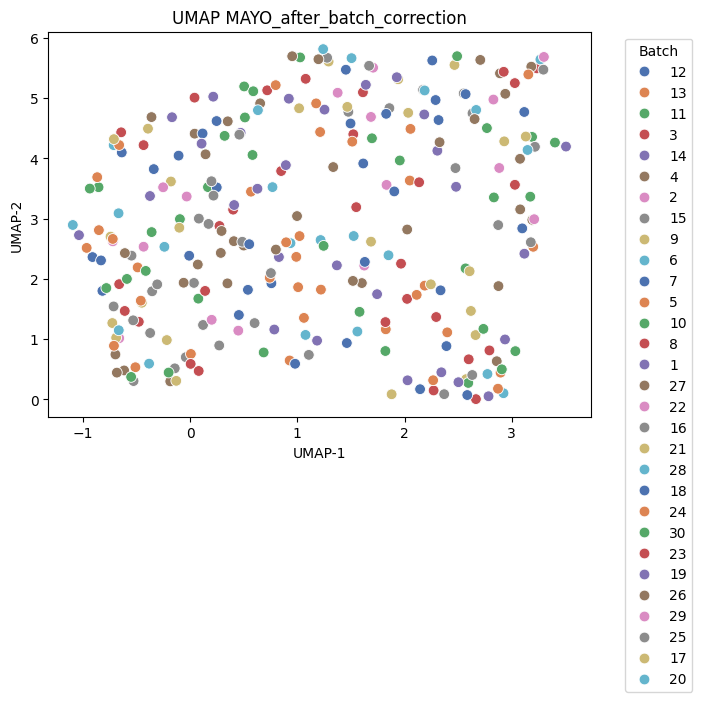

In [ ]:
plot(data_combat, metadata, plot_type='umap', name='MSBB_after_batch_correction')

In [ ]:
data_combat.to_csv("./AMP_AD_datasets/ROSMAP_counts1_v3.csv")

In [3]:
# The design matric is singular or not??

import numpy as np
import pandas as pd

metadata = pd.read_csv('metadata_merged.csv', index_col='specimenID')
metadata = metadata[(metadata['study'] == 'MSBB')]

# Encoding the categorical data
metadata_encoded = pd.get_dummies(metadata[['sex', 'diagnosis']], drop_first=True)

# Checking the rank of the matrix
rank = np.linalg.matrix_rank(metadata_encoded.values)

print("Rank of the matrix:", rank)
print("Shape of the matrix:", metadata_encoded.shape)

# Determine if the matrix is singular or non-singular
if rank < min(metadata_encoded.shape):
    print("The matrix is singular.")
else:
    print("The matrix is non-singular.")


Rank of the matrix: 2
Shape of the matrix: (862, 2)
The matrix is non-singular.


# ML model (RF) -- baseline

## Imbalanced dataset

### 1. Without clinical vars

In [ ]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset and metadata
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

metadata_path = 'backup/metadata_v3.csv'  # This seems to be the same as dataset_path, double-check if this is correct
df_metadata = pd.read_csv(metadata_path, index_col=0)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Select features and target
X = df_features
y = df_metadata['diagnosis']

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, scoring='roc_auc', random_state=42, n_jobs=2)
random_search.fit(X, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

### 2. With clinical vars

In [ ]:
# With onehotencoder (July 2024)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

# Load the gene expression data
dataset_path = './AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'backup/metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)
df_metadata = df_metadata[(df_metadata['study'] == 'ROSMAP')]

# Drop the unnecessary columns from the metadata
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish', 'pmi', "RIN", 'study', 'ethnicity','AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study', 'batch'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and 'specimenID' from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID'])

# One-hot encode the categorical variables
categorical_features = ['tissue', 'apoe4_allele', 'sex']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

# Check the target distribution
print(y.value_counts(normalize=True))



diagnosis
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
X_encoded

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,RIN2,age_death,tissue_1,tissue_3,tissue_6,apoe4_allele_0,apoe4_allele_1,apoe4_allele_2,sex_0,sex_1
0,2.693056,4.008124,3.843684,1.891460,2.131878,5.089801,2.564877,4.163159,4.105802,4.275373,...,47.61,72.720055,False,True,False,True,False,False,True,False
1,2.952038,4.146917,3.819310,1.672045,1.707203,3.071029,3.198746,5.275337,4.577458,4.262465,...,70.56,81.111567,False,True,False,True,False,False,True,False
2,2.935881,4.394735,4.399317,1.909150,1.711887,3.485700,3.305756,5.022003,4.313655,4.688572,...,50.41,80.906229,False,True,False,True,False,False,False,True
3,3.970723,3.811088,3.519447,1.613139,3.515993,4.746188,3.800684,5.696683,4.843922,3.624694,...,50.41,87.753593,False,True,False,True,False,False,True,False
4,3.555162,3.863562,3.737334,2.403238,4.053856,5.039985,3.336166,5.500272,4.573848,4.143737,...,54.76,90.000000,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,3.997896,3.664660,3.606317,1.843396,2.878161,4.424131,3.779642,5.042640,4.917630,3.775050,...,23.04,90.000000,False,True,False,True,False,False,False,True
1226,3.838267,4.284751,3.479254,1.436041,2.456957,4.752588,3.992392,5.895573,4.736819,3.575024,...,68.89,87.200548,True,False,False,True,False,False,False,True
1227,3.460458,4.213021,3.716468,1.841433,4.239843,5.375558,3.510389,4.671199,4.571667,3.160345,...,62.41,84.752909,False,True,False,True,False,False,False,True
1228,4.105213,4.121475,3.380223,1.784129,3.340700,5.475074,3.553546,6.069121,4.703217,3.542863,...,68.89,90.000000,True,False,False,True,False,False,False,True


In [ ]:
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, scoring='roc_auc', random_state=42, n_jobs=2)
random_search.fit(X_encoded, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X_encoded, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

## Random oversampled dataset

### 1. Without clinical vars

In [ ]:
# Load the dataset and metadata
dataset_path = '/home/vmottaqi/rnaseq_synapse/backup/ROSMAP_counts_v6.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_features

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000287978,ENSG00000287985,ENSG00000288011,ENSG00000288025,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288075,ENSG00000288107
sample_index,,,,,,,,,,,,,,,,,,,,,
487_120515,2.693056,4.008124,3.843684,1.891460,2.131878,5.089801,2.564877,4.163159,4.105802,4.275373,...,1.892324,0.680168,1.689954,2.831027,0.617244,1.545664,-0.547594,3.269352,4.395686,2.913610
182_120424,2.952038,4.146917,3.819310,1.672045,1.707203,3.071029,3.198746,5.275337,4.577458,4.262465,...,1.396146,1.114917,1.750664,2.448238,0.277121,0.514422,0.597116,3.664030,3.934631,2.502630
193_120424,2.935881,4.394735,4.399317,1.909150,1.711887,3.485700,3.305756,5.022003,4.313655,4.688572,...,1.281214,1.294638,2.047225,1.919104,0.219337,-0.596076,-5.247300,3.774892,3.034315,1.800074
694_120605,3.970723,3.811088,3.519447,1.613139,3.515993,4.746188,3.800684,5.696683,4.843922,3.624694,...,-2.986291,-0.357597,1.358419,1.261599,-0.455351,1.506439,-0.391900,3.188582,3.419970,0.863133
366_120502,3.555162,3.863562,3.737334,2.403238,4.053856,5.039985,3.336166,5.500272,4.573848,4.143737,...,1.707821,1.329693,1.540511,2.377912,0.960361,0.552581,-5.109539,3.378009,3.621923,1.674681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_R3633816-DLPFC_generated_275,3.997896,3.664660,3.606317,1.843396,2.878161,4.424131,3.779642,5.042640,4.917630,3.775050,...,1.020193,1.006702,0.503810,1.959549,-0.349568,0.842281,-5.542758,3.027248,3.291152,2.223133
Sample_R4841941-AC_generated_276,3.838267,4.284751,3.479254,1.436041,2.456957,4.752588,3.992392,5.895573,4.736819,3.575024,...,1.521379,1.227082,1.791603,1.063421,-0.215804,2.318255,-5.542558,4.195082,2.600056,-0.371567
152_120419_generated_277,3.460458,4.213021,3.716468,1.841433,4.239843,5.375558,3.510389,4.671199,4.571667,3.160345,...,1.389889,1.176935,0.755648,2.371575,1.368906,-2.323084,-4.820305,2.249645,3.360109,1.858879


In [ ]:
metadata_path = 'backup/metadata_v6_rosmap.csv'  # This seems to be the same as dataset_path, double-check if this is correct
df_metadata = pd.read_csv(metadata_path, index_col=0)
df_metadata

,individualID,diagnosis,tissue,race,spanish,apoe4_allele,sex,batch,pmi,RIN,RIN2,age_death,AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED,RnaSeqMetrics_PCT_INTRONIC_BASES,RnaSeqMetrics_PCT_INTERGENIC_BASES,RnaSeqMetrics_PCT_CODING_BASES,ethnicity,study
specimenID,,,,,,,,,,,,,,,,,,
487_120515,R9904978,0,3,1.0,2.0,0,0,4,12.433333,6.9,47.61,72.720055,0.931411,0.225013,0.058488,0.342722,NaN,ROSMAP
182_120424,R9818080,0,3,1.0,2.0,0,0,7,16.000000,8.4,70.56,81.111567,0.944450,0.172408,0.041036,0.394201,NaN,ROSMAP
193_120424,R9817161,1,3,1.0,2.0,0,1,4,1.750000,7.1,50.41,80.906229,0.958718,0.203963,0.048166,0.357855,NaN,ROSMAP
694_120605,R9817056,0,3,1.0,2.0,0,0,4,6.416667,7.1,50.41,87.753593,0.960609,0.201002,0.045065,0.397276,NaN,ROSMAP
366_120502,R9809661,1,3,1.0,2.0,1,1,7,17.416667,7.4,54.76,90.000000,0.931962,0.205742,0.048650,0.378299,NaN,ROSMAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_R3633816-DLPFC_generated_275,R3633816,0,3,1.0,2.0,0,1,13,10.000000,4.8,23.04,90.000000,0.972683,0.236756,0.052455,0.402484,NaN,ROSMAP
Sample_R4841941-AC_generated_276,R4841941,0,1,1.0,2.0,0,1,13,4.566667,8.3,68.89,87.200548,0.931253,0.138633,0.038016,0.431760,NaN,ROSMAP
152_120419_generated_277,R6231758,0,3,1.0,2.0,0,1,7,5.750000,7.9,62.41,84.752909,0.931772,0.174084,0.040140,0.398235,NaN,ROSMAP


In [ ]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset and metadata
dataset_path = '/home/vmottaqi/rnaseq_synapse/backup/ROSMAP_counts_v6.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

metadata_path = 'backup/metadata_v6_rosmap.csv'  # This seems to be the same as dataset_path, double-check if this is correct
df_metadata = pd.read_csv(metadata_path, index_col=0)

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Select features and target
X = df_features
y = df_metadata['diagnosis']


In [ ]:
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, scoring='roc_auc', random_state=42, n_jobs=2)
random_search.fit(X, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

KeyboardInterrupt: 

### 2. With clinical vars

In [ ]:
# With onehotencoder (July 2024)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

# Load the gene expression data
dataset_path = 'backup/ROSMAP_counts_v6.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'backup/metadata_v6_rosmap.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Drop the unnecessary columns from the metadata
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish', 'pmi', "RIN", 'study', 'ethnicity','AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study', 'batch'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and 'specimenID' from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID'])

# One-hot encode the categorical variables
categorical_features = ['tissue', 'apoe4_allele', 'sex']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=False)

# Check the target distribution
print(y.value_counts(normalize=True))



diagnosis
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
X_encoded

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,RIN2,age_death,tissue_1,tissue_3,tissue_6,apoe4_allele_0,apoe4_allele_1,apoe4_allele_2,sex_0,sex_1
0,2.693056,4.008124,3.843684,1.891460,2.131878,5.089801,2.564877,4.163159,4.105802,4.275373,...,47.61,72.720055,False,True,False,True,False,False,True,False
1,2.952038,4.146917,3.819310,1.672045,1.707203,3.071029,3.198746,5.275337,4.577458,4.262465,...,70.56,81.111567,False,True,False,True,False,False,True,False
2,2.935881,4.394735,4.399317,1.909150,1.711887,3.485700,3.305756,5.022003,4.313655,4.688572,...,50.41,80.906229,False,True,False,True,False,False,False,True
3,3.970723,3.811088,3.519447,1.613139,3.515993,4.746188,3.800684,5.696683,4.843922,3.624694,...,50.41,87.753593,False,True,False,True,False,False,True,False
4,3.555162,3.863562,3.737334,2.403238,4.053856,5.039985,3.336166,5.500272,4.573848,4.143737,...,54.76,90.000000,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,3.997896,3.664660,3.606317,1.843396,2.878161,4.424131,3.779642,5.042640,4.917630,3.775050,...,23.04,90.000000,False,True,False,True,False,False,False,True
1226,3.838267,4.284751,3.479254,1.436041,2.456957,4.752588,3.992392,5.895573,4.736819,3.575024,...,68.89,87.200548,True,False,False,True,False,False,False,True
1227,3.460458,4.213021,3.716468,1.841433,4.239843,5.375558,3.510389,4.671199,4.571667,3.160345,...,62.41,84.752909,False,True,False,True,False,False,False,True
1228,4.105213,4.121475,3.380223,1.784129,3.340700,5.475074,3.553546,6.069121,4.703217,3.542863,...,68.89,90.000000,True,False,False,True,False,False,False,True


In [ ]:
from scipy.stats import randint
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for random search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Perform random search with cross-validation
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=10, scoring='roc_auc', random_state=42, n_jobs=2)
random_search.fit(X_encoded, y)

# Print the best parameters and the best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Perform cross-validation with the best parameters
rf_best = random_search.best_estimator_
cv_results = cross_validate(rf_best, X_encoded, y, cv=10, scoring=['recall', 'f1', 'accuracy', 'precision', 'roc_auc'])

# Print the cross-validation results for each metric
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']
for metric in scoring_metrics:
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

# Merging three datasets and Select genes set using MAD (mean absolute deviation)

## 1. Merging

In [ ]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('path_to_first_dataset.csv', index_col=0)
df2 = pd.read_csv('path_to_second_dataset.csv', index_col=0)
df3 = pd.read_csv('path_to_third_dataset.csv', index_col=0)

# Concatenate the datasets
# Assuming all datasets have the same columns (genes) and the rows (samples) need to be merged
combined_df = pd.concat([df1, df2, df3], axis=0)

# If you need to ensure that the genes align correctly and are consistent across datasets, you could also include:
# combined_df = pd.concat([df1, df2, df3], axis=0, join='inner')

# Check the combined DataFrame
print(combined_df.shape)
print(combined_df.head())

# Optionally, save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_rnaseq_data.csv')


## 2. Check

In [ ]:
import pandas as pd
dataset_path = 'ROSMAP_counts_v9_17k_SMOTE.csv'
df = pd.read_csv(dataset_path, index_col=0)
df

In [ ]:
# Check for NULL values in the dataset
null_values_exist = df.isnull().any().any()

if null_values_exist:
    print("There are NULL values in the dataset.")
else:
    print("There are no NULL values in the dataset.")

There are no NULL values in the dataset.


In [ ]:
import pandas as pd
from statsmodels.robust.scale import mad

# Load your data
dataset_path = 'ROSMAP_counts_v9_17k_SMOTE.csv'
df = pd.read_csv(dataset_path, index_col=0)

# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

# Select the top 4000 most variable genes
most_variable_genes = ranked_genes[:4000]

# Print the ranked list of genes
print("Ranked genes from most variable to least variable:")
print(ranked_genes)
print('Top 4000 most variable genes:')
print(most_variable_genes)


## 3. Removing least vareiable genes from dataset

In [ ]:
import pandas as pd
from statsmodels.robust.scale import mad

# Load your data
dataset_path = 'ROSMAP_counts_v9_17k_SMOTE.csv'
df = pd.read_csv(dataset_path, index_col=0)

# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

# Select the top 4000 most variable genes
most_variable_genes = ranked_genes[:4000]

# Print the ranked list of genes
print("Ranked genes from most variable to least variable:")
print(ranked_genes)
print('Top 4000 most variable genes:')
print(most_variable_genes)

# Filter the DataFrame to keep only the top 4000 most variable genes
df_filtered = df[most_variable_genes]

# Save the filtered DataFrame to a new CSV file
new_csv_file_path = 'ROSMAP_counts_v9_13k_SMOTE.csv'
df_filtered.to_csv(new_csv_file_path, index=True)


In [ ]:
import pandas as pd
dataset_path = 'ROSMAP_counts_v8_original_13k.csv'
df = pd.read_csv(dataset_path, index_col=0)
df

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000287978,ENSG00000287985,ENSG00000288011,ENSG00000288025,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288075,ENSG00000288107
487_120515,2.693056,4.008124,3.843684,1.891460,2.131878,5.089801,2.564877,4.163159,4.105802,4.275373,...,1.892324,0.680168,1.689954,2.831027,0.617244,1.545664,-0.547594,3.269352,4.395686,2.913610
182_120424,2.952038,4.146917,3.819310,1.672045,1.707203,3.071029,3.198746,5.275337,4.577458,4.262465,...,1.396146,1.114917,1.750664,2.448238,0.277121,0.514422,0.597116,3.664030,3.934631,2.502630
193_120424,2.935881,4.394735,4.399317,1.909150,1.711887,3.485700,3.305756,5.022003,4.313655,4.688572,...,1.281214,1.294638,2.047225,1.919104,0.219337,-0.596076,-5.247300,3.774892,3.034315,1.800074
694_120605,3.970723,3.811088,3.519447,1.613139,3.515993,4.746188,3.800684,5.696683,4.843922,3.624694,...,-2.986291,-0.357597,1.358419,1.261599,-0.455351,1.506439,-0.391900,3.188582,3.419970,0.863133
366_120502,3.555162,3.863562,3.737334,2.403238,4.053856,5.039985,3.336166,5.500272,4.573848,4.143737,...,1.707821,1.329693,1.540511,2.377912,0.960361,0.552581,-5.109539,3.378009,3.621923,1.674681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RISK_81,3.480599,4.551965,3.794995,2.044125,2.658725,5.550509,3.364785,4.804389,4.476099,4.117583,...,2.346634,0.917420,1.872746,2.475703,0.227905,-0.805499,-4.915610,4.155401,3.197329,2.047402
RISK_9_rerun,3.033182,3.598383,3.430243,1.701873,2.982793,3.559018,3.009816,5.052380,4.491756,4.041375,...,0.084201,0.165583,1.214401,1.854056,0.874431,1.085004,-5.813749,2.268562,3.611761,0.364139
RISK_93,4.234210,4.465530,4.319146,2.264421,2.106420,4.098086,3.708144,5.490788,4.406034,3.908534,...,1.726131,1.341263,2.480019,1.947281,-1.029335,0.544776,-3.861985,4.389101,3.446107,1.381710
RISK_94,4.074123,4.374235,4.164492,2.307973,1.930466,4.041678,3.714398,5.463185,4.406323,4.232183,...,1.195124,0.974912,2.112795,2.120084,0.340579,0.772254,-5.215149,3.750806,3.277829,0.504551
